# Fake New Classification using news headline

In this notebook I have demonstrated the machine learning approach to detect fake news from news headline

In [20]:
import pandas as pd
import numpy as np
import itertools
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
df = pd.read_csv('fake_news.csv')

In [22]:
df.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


### Data Cleaning

In [23]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [24]:
# converting to lowercase
df['title']=df['title'].str.lower()
df.head()

,title,text,label
0,"as u.s. budget fight looms, republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,u.s. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,senior u.s. republican senator: 'let mr. muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,fbi russia probe helped by australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,trump wants postal service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


### Removing Stopwords

In [25]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

In [26]:
spec_chars = ["-","!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, '')





df.head()

,title,text,label
0,us budget fight looms republicans flip fiscal ...,WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,us military accept transgender recruits monday...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,senior us republican senator let mr mueller job,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,fbi russia probe helped australian diplomat ti...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,trump wants postal service charge much more am...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


### shuffle dataframe

In [27]:
df =df.reindex(np.random.permutation(df.index))

In [28]:
df.head()

,title,text,label
36745,nc event change name word ‘dixie’ racist ‘offe...,This is political correctness run amuck with t...,FAKE
43715,us middle class still suffering rockefellerkis...,Dick Eastman The Truth HoundWhen Henry Kissin...,FAKE
15378,zimbabwes axed vp safe traveling south africa ...,JOHANNESBURG (Reuters) - Zimbabwe s former vic...,TRUE
38927,in disgraced democrat harry reid funneled mass...,The Defense Department secretly set up a progr...,FAKE
21792,trump fans crying milk hero breaks yet another...,"Trump made a bad decision, or so his ardent fo...",FAKE


In [29]:
y = df.label

In [30]:
X = df['title']

### Train test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

### Baseline model using count vectorizer

In [32]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

accuracy:   0.940
Confusion matrix, without normalization


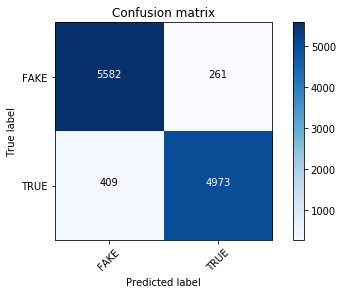

In [33]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.943
Confusion matrix, without normalization


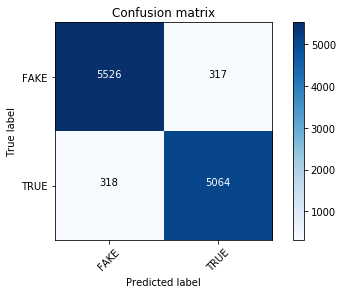

In [34]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy:   0.951
Confusion matrix, without normalization


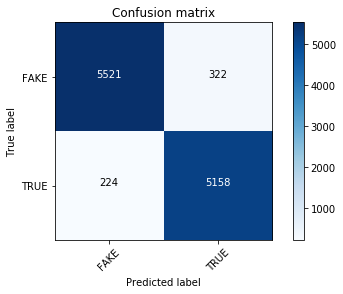

In [35]:
clf = LogisticRegression()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## TFIDF Experiment (n_gram=2 (bigram) and max_df)

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy:   0.941
Confusion matrix, without normalization


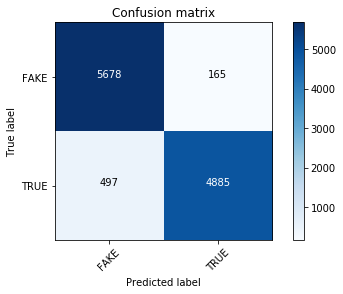

In [62]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.959
Confusion matrix, without normalization


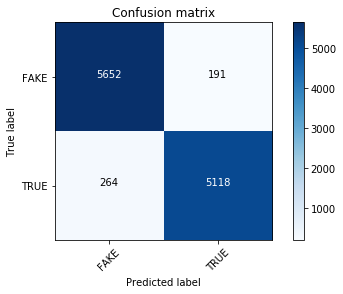

In [63]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.946
Confusion matrix, without normalization


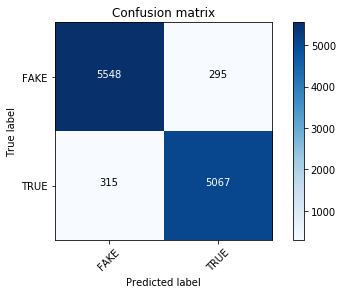

In [64]:
log_tf = LogisticRegression()
log_tf.fit(tfidf_train_2, y_train)
pred = log_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## TFIDF Experiment (n_gram=3 (trigram) and max_df)

In [66]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

accuracy:   0.941
Confusion matrix, without normalization


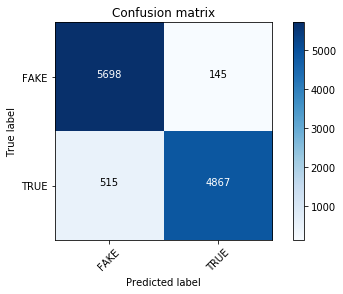

In [67]:
mnb_tf2 = MultinomialNB()
mnb_tf2.fit(tfidf_train_3, y_train)
pred = mnb_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.958
Confusion matrix, without normalization


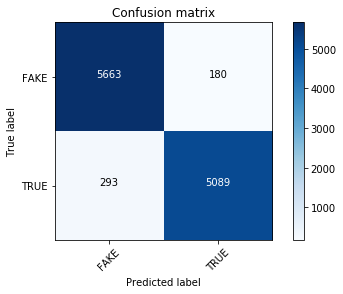

In [68]:
pass_tf2 = PassiveAggressiveClassifier()
pass_tf2.fit(tfidf_train_3, y_train)
pred = pass_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.940
Confusion matrix, without normalization


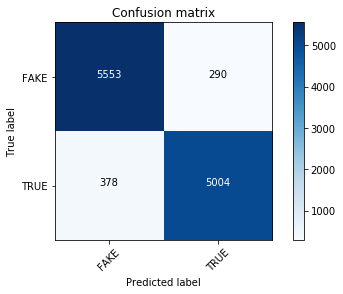

In [69]:
log_tf2 = LogisticRegression()
log_tf2.fit(tfidf_train_3, y_train)
pred = log_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [58]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,00,02,025,0330,0930,10,100,1000,10000,100000,...,zones,zoo,zschaepe,zuckerberg,zulia,zuma,zumas,zurich,état,žižek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, pass_tf, n=10)

FAKE -15.726725920823498 video
FAKE -8.203009566802208 breaking
FAKE -7.925680913325372 hillary
FAKE -7.886026956177907 gop
FAKE -7.453474202930462 watch
FAKE -5.257061404941885 racist
FAKE -4.659838779633869 tweets
FAKE -4.439127182902908 america
FAKE -4.21994326414817 won
FAKE -3.9224814595067192 details

TRUE 6.497287683258772 trumps
TRUE 5.528881975282868 says
TRUE 4.961962816871995 factbox
TRUE 3.5093921743672136 exclusive
TRUE 3.4058444729756503 urges
TRUE 3.290121220768436 islamic state
TRUE 3.253558902201538 rohingya
TRUE 3.057140858761049 seek
TRUE 3.0429010749600702 lawmakers
TRUE 2.9478581964430064 german


In [73]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3, pass_tf, n=10)

FAKE -15.726725920823498 landscape
FAKE -8.203009566802208 arpaio arresting
FAKE -7.925680913325372 court justice nomination
FAKE -7.886026956177907 conference wednesday white
FAKE -7.453474202930462 leads criminal
FAKE -5.257061404941885 genealogy trump uturn
FAKE -4.659838779633869 killed 200
FAKE -4.439127182902908 additional barriers
FAKE -4.21994326414817 libs twitter nuts
FAKE -3.9224814595067192 called khizr

TRUE 6.497287683258772 kellyanne conway presidents
TRUE 5.528881975282868 harry recent engagement
TRUE 4.961962816871995 chrischristie busted beach
TRUE 3.5093921743672136 chief declines comment
TRUE 3.4058444729756503 korea security jitters
TRUE 3.290121220768436 debate whiniest
TRUE 3.253558902201538 guess spotted vip
TRUE 3.057140858761049 hezbollah disarms
TRUE 3.0429010749600702 destroyed life
TRUE 2.9478581964430064 commitments bans


### Hashing Vectorizer (Exploring parameters n_gram)

In [44]:
hash_vectorizer = HashingVectorizer(stop_words='english',ngram_range=(1,2))
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

accuracy:   0.956
Confusion matrix, without normalization


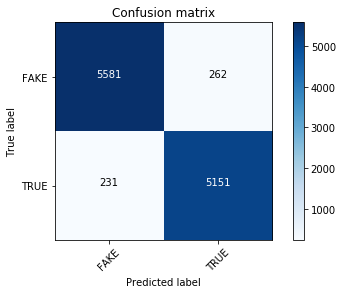

In [45]:
clf = PassiveAggressiveClassifier()
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.938
Confusion matrix, without normalization


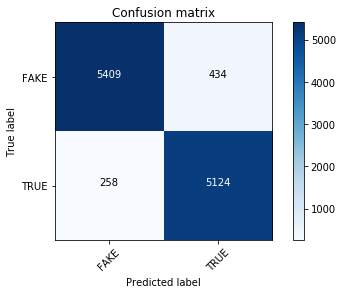

In [46]:
clf = LogisticRegression()
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])